## Facial Identfication Implementation 

The objective of this notebook is to implement the following

1. **Obtain and Download the VGGFace2 Model**. 

   This model will be used as the baseline for the project. The output layer of the model will be removed, and a dynamic output layer will be used, to tailor this new model for the purpose of the project. 


2. **Collect Pictures that will be used as training data**

   Collect at least 10 facial pictures of different people. Luckily, ImageDataGenerator will be used to label and annotate the images. The only requirement would be, for every person(class), have a designated folder, where their images will be stored.


3. As the first iteration of the project, it will be implemented without the functionality of a dynamic project, this will be added, once baseline functionality is satisfactory.


**MachineLearningMastery** is acknowledged for provding a guideline on how to do this project: https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

In [ ]:
# Import all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Facial Detection Phase

Before, facial identifcation can be performed, we will need to be able to detect faces from photographs. Face detection is the process of automatically locating faces in a photograph and localizing them by drawing a bounding box around their extent. 

Thus for this purpose, the **Multi-Task Cascaded Convolutional Neural Network** will be used to detect faces in images.


In [ ]:
# install the mtcnn

!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 3.5 MB/s 


In [ ]:
# Import mtcnn and check version

import mtcnn 
from mtcnn.mtcnn import MTCNN
print("The MTCNN VErsion IS :", mtcnn.__version__)

The MTCNN VErsion IS : 0.1.0


Create a helper function, that will extract face from a photograph, by   localizing them by drawing a bounding box around their extent.

It should be noted, that the VGGFace2 model takes as **input (224, 224)** images and so does the MTCNN 

In [ ]:
from PIL import Image
def extract_face(filename, required_size=(224, 224)):
  # Step 1: read the image from the file
  image_pixels = plt.imread(filename)

  #Create a mtcnn object, which will be used to extract the faces, using detect_faces method
  face_detector = MTCNN()
  face_results = face_detector.detect_faces(image_pixels)

  #extract bounding box around face
  x1, y1, width, height = face_results[0]["box"]
  x2, y2 = x1 + width, y1 + height

  #extract the face
  user_face = image_pixels[y1:y2, x1:x2]

  #Resize the image to the required size
  user_face_final = Image.fromarray(user_face)
  user_face_final = user_face_final.resize(required_size)
  face_array = np.asarray(user_face_final)

  return face_array

1/1 [==============================] - 0s 142ms/step


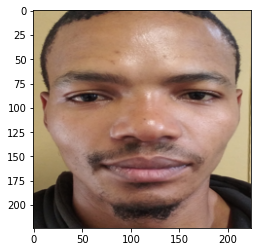

In [ ]:
# Test the code out with an image
file_name = "/content/Mbasa_06.jpg"
person = extract_face(file_name)
plt.imshow(person)
plt.show()

Face Detection works. The next step, will be to load and obatin the VGGFace_model and exclude the output layer.

In [ ]:
# Install the library 
!pip install git+https://github.com/rcmalli/keras-vggface.git
# Install the model
!pip install keras_vggface
#Show the model details
!pip show keras-vggface
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-89tbumbv
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-89tbumbv
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8324 sha256=491647dbe55f961f93552295716051c0e64909326f594cfd154a9b852a2d4cc0
  Stored in directory: /tmp/pip-ephem-wheel-cache-znawym22/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras, pillow, pyyaml, h5p

20951

In [ ]:
!pip install Keras_Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.7 MB/s 


In [ ]:
from keras_vggface.vggface import VGGFace

##Now that we have successfully loaded the model, we can load the part that we need. We will disregard the output layer and input layer. The resnet variation of the model will be used.

In [ ]:
#custom parameters
nb_class = 4

vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))
last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
out = Dense(nb_class, activation='softmax', name='classifier')(x)
custom_vgg_model = Model(vgg_model.input, out)
custom_vgg_model.summary()

58909280/58909280 [==============================] - 7s 0us/step
Model: "model_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_97 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                           

Apply Face Detection Function to all images

In [ ]:
import glob
import cv2

new_images = []

#Training Directory
mbasa_training_dir = "/content/Mbasa_Images/"
mbasa_training_images = glob.glob(mbasa_training_dir + "*.jpg")
derbey_training_dir = "/content/Derbey_Images/"
derbey_training_images = glob.glob(derbey_training_dir + "*.jpg")
prince_training_dir = "/content/Prince_Images/"
prince_training_images = glob.glob(prince_training_dir + "*.jpg")
hash_training_dir = "/content/Hash_Images/"
hash_training_images = glob.glob(hash_training_dir + "*.jpg")

for image in prince_training_images:
  print(image)
  face = extract_face(image)
  new_images.append(face)



/content/Prince_Images/Prince_05.jpg
1/1 [==============================] - 0s 139ms/step
/content/Prince_Images/Prince_04.jpg
1/1 [==============================] - 0s 137ms/step
/content/Prince_Images/Prince_02.jpg
1/1 [==============================] - 0s 131ms/step
/content/Prince_Images/Prince_01.jpg
1/1 [==============================] - 0s 144ms/step
/content/Prince_Images/Prince_06.jpg
1/1 [==============================] - 0s 142ms/step
/content/Prince_Images/Prince_03.jpg
1/1 [==============================] - 0s 144ms/step


In [ ]:
print(len(new_images))

6


In [ ]:
for i in range(len(new_images)):
  image = new_images[i]
  image_ready = Image.fromarray(image)
  image_ready.save("/content/Training/Prince/prince_0" + str(i) + ".jpeg")

# Setup Preprocssing Pipeline

In [ ]:
def extraction(image_pixels, required_size=(224, 224)):
  #Create a mtcnn object, which will be used to extract the faces, using detect_faces method
  face_detector = MTCNN()
  face_results = face_detector.detect_faces(image_pixels)

  #extract bounding box around face
  x1, y1, width, height = face_results[0]["box"]
  x2, y2 = x1 + width, y1 + height

  #extract the face
  user_face = image_pixels[y1:y2, x1:x2]

  #Resize the image to the required size
  user_face_final = Image.fromarray(user_face)
  user_face_final = user_face_final.resize(required_size)
  face_array = np.asarray(user_face_final)

  return face_array

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

training_dir = "/content/Training"

validation_dir = "/content/Validation"

train_datagen = ImageDataGenerator(rescale=1./255,
        brightness_range=[0.1, 0.7],                           
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        preprocessing_function = preprocess_input)

traingen = train_datagen.flow_from_directory(training_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes= ["Derbey", "Hash","Mbasa", "Prince"],
                                               subset='training', 
                                               shuffle=True,
                                              )

valid_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)

validgen = valid_datagen.flow_from_directory(validation_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes= ["Derbey", "Hash","Mbasa", "Prince"],
                                               shuffle=True,
                                              )


Found 17 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


In [ ]:
#Compile the model
optimizer = RMSprop(learning_rate=0.0001)
custom_vgg_model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.2 MB/s 


In [ ]:
# Set Up Callbacks

from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')
#Reduce the learning rate when a plateau is reached
lr_reduce = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2,
                              patience=5, 
                              min_lr=0.001
)

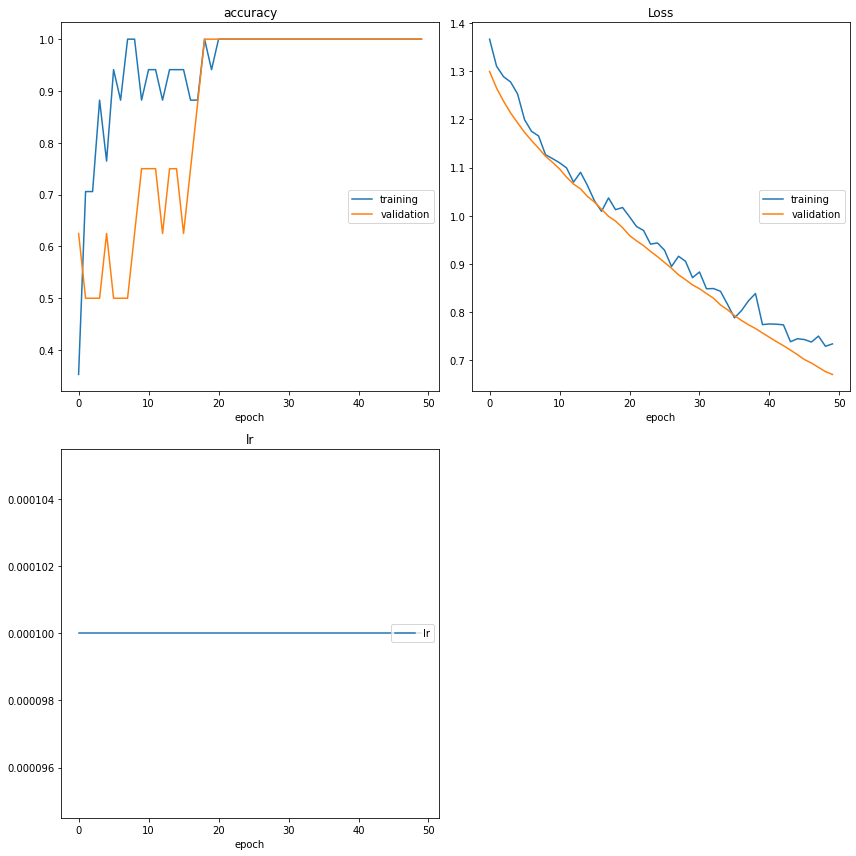

accuracy
	training         	 (min:    0.353, max:    1.000, cur:    1.000)
	validation       	 (min:    0.500, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.729, max:    1.367, cur:    0.734)
	validation       	 (min:    0.670, max:    1.299, cur:    0.670)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
1/1 [==============================] - 15s 15s/step - loss: 0.7339 - accuracy: 1.0000 - val_loss: 0.6705 - val_accuracy: 1.0000 - lr: 1.0000e-04


In [ ]:
vgg_history = custom_vgg_model.fit(traingen,
                            epochs=50,
                            validation_data=validgen,
                            callbacks=[early_stop, lr_reduce,plot_loss_1],
                            verbose=1)

## Test the Model on sample images

In [ ]:
derbey_image = extract_face("prince_01.jpg")
samples = np.expand_dims(derbey_image, axis=0)
test_image = preprocess_input(samples)
print(test_image.shape) 
yhat = custom_vgg_model.predict(test_image)

1/1 [==============================] - 0s 153ms/step
(1, 224, 224, 3)
1/1 [==============================] - 1s 683ms/step


In [ ]:
print()

[[1. 0. 0.]]


Before, the model is converted, it has to be saved in

In [ ]:
custom_vgg_model.save("/content/custom_vgg_model.h5")

## Model Conversion

Convert the Model to a tensorflow JS model from the Keras Model Format, which saves an HDF5 file, it will be converted into a binary files, with the model weights as well json file, containing the model topology.

In [ ]:
! pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#COnvert the model to tfjs model
! tensorflowjs_converter --input_format keras /content/custom_vgg_model.h5 /content/tfjs_model

2022-11-15 00:13:34.001463: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 00:13:35.413640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.7/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-15 00:13:35.413863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.7/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-15 00:13:35.413886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War